In [1]:
import os
import glob
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr #Loocv

import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append('custom_function/')
import clustering

In [3]:
def cluster_rdm(cluster_results_region,cluster_model='cl_k3'):
    dissim_cluster_result = pd.DataFrame(index = cluster_results_region.index,
                                         columns = cluster_results_region.index)
    for i in dissim_cluster_result.index:
        for j in dissim_cluster_result.columns:
            # cluster result was in the last column
            if cluster_results_region.loc[i,cluster_model] == cluster_results_region.loc[j,cluster_model]:
                dissim_cluster_result.loc[i,j] = 0
            else:
                dissim_cluster_result.loc[i,j] = 1
            dissim_cluster_result = dissim_cluster_result.astype(float)
            
    return(dissim_cluster_result)

In [4]:
relationships = pd.read_csv('../DataClean_FAVEE_HPP/input_data/RelDim_labels/159relationships_fix_label.csv',
                           index_col=0)
relationships = relationships['0'].to_list()

dim_rel_scaled_total = pd.read_csv('Total/clean_results/Total_scale_var_33v.csv',index_col=0)
dim_rel_scaled_total.index = relationships
pca_5c_33d_scores_total = pd.read_csv('Total/pca_results/Total_scores_var_5c_33d.csv',index_col=0) 
pca_5c_33d_scores_total.columns = ['Activeness','Exchange','Formality','Equality','Valence']
pca_5c_33d_scores_total.index = relationships
# the three dimensions are reversed
pca_5c_33d_scores_total['Activeness'] = -pca_5c_33d_scores_total['Activeness']
pca_5c_33d_scores_total['Formality'] = -pca_5c_33d_scores_total['Formality']
pca_5c_33d_scores_total['Valence'] = -pca_5c_33d_scores_total['Valence']

# Total world

## clustering results

### HPP

Text(0, 0.5, 'Silhouette Value')

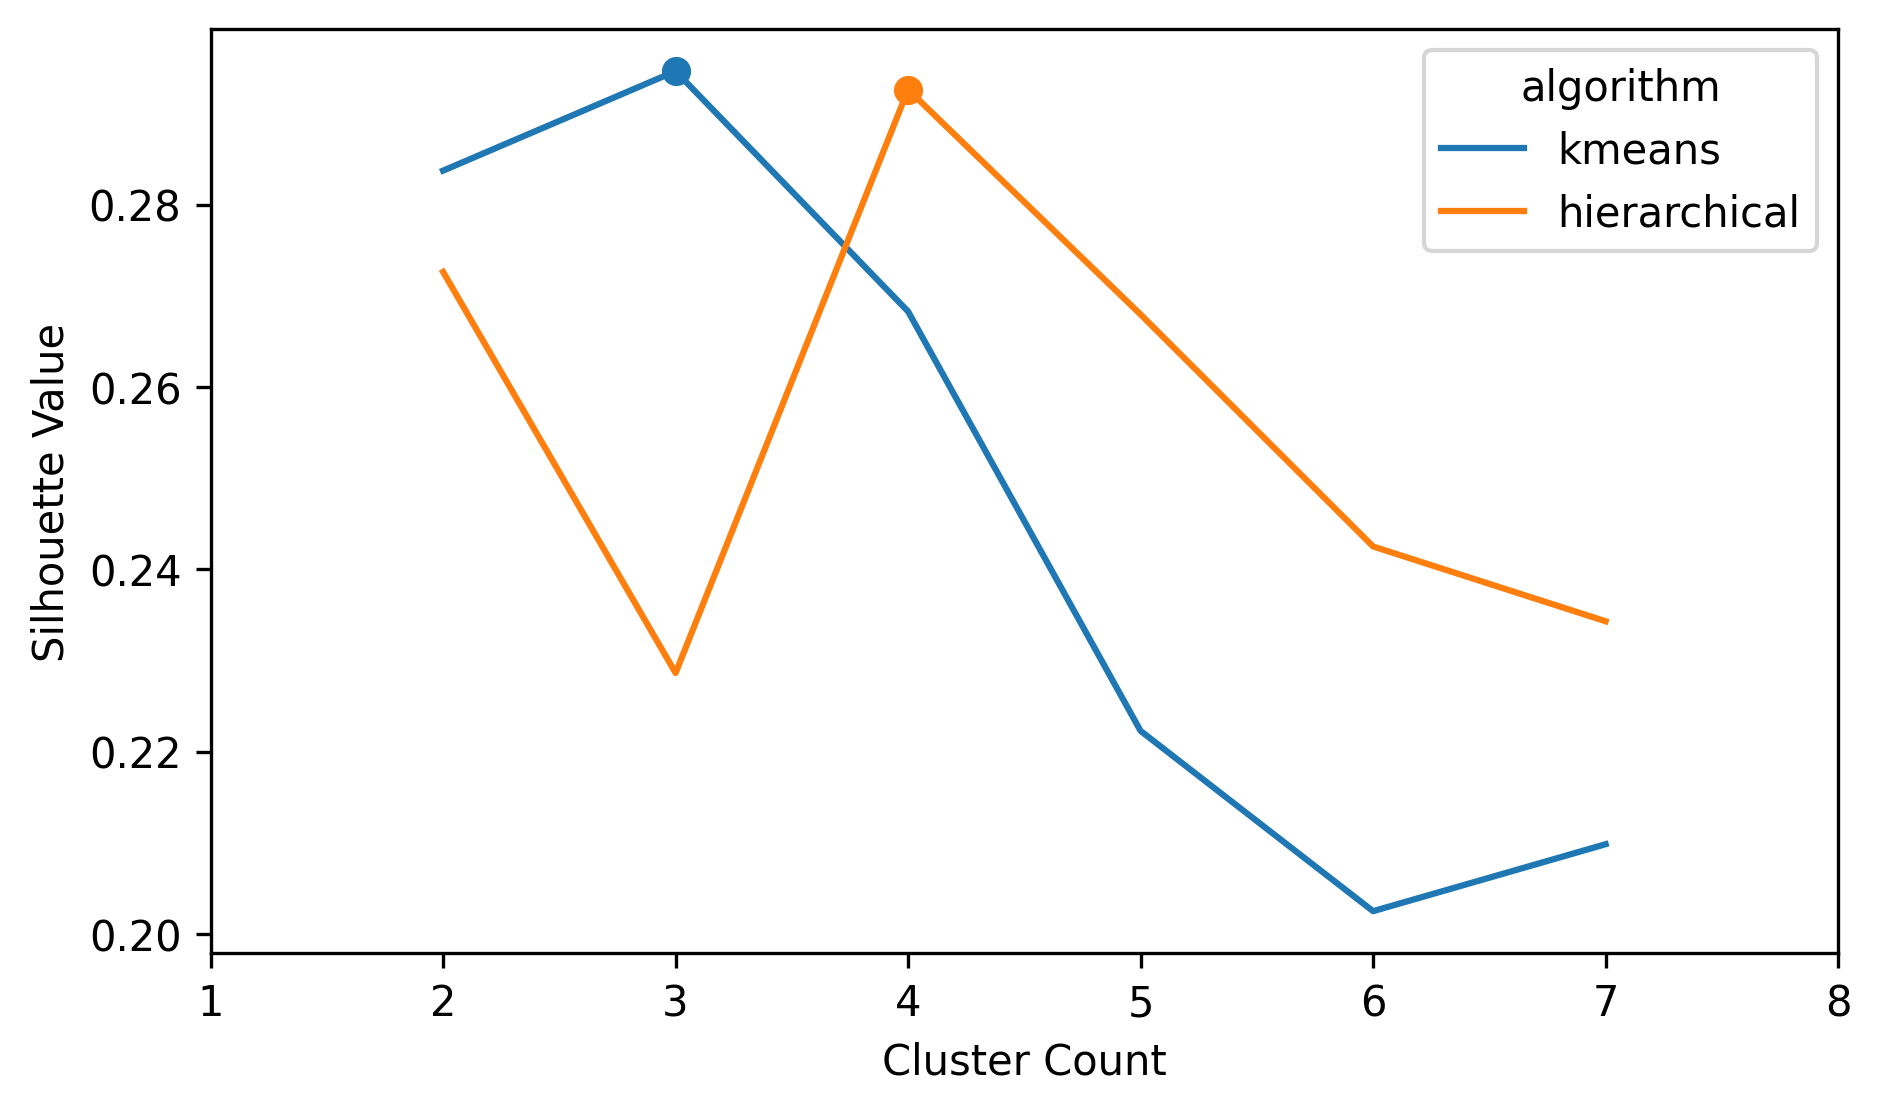

In [5]:
silhouette_result_df = clustering.optimalK_grouped(data_type='df', data=dim_rel_scaled_total, 
                            algorithm1='kmeans', algorithm2='hierarchical', 
                            title='', random_state=2022, maxClusters=8)
# Plot the silhouette scores for each algorithm
plt.figure(figsize=(7,4),dpi=300)
plt.xlim(1,8)
sns.lineplot(data=silhouette_result_df, x="clusterCount", y="silhouette", hue="algorithm")

algorithm1_df = silhouette_result_df[silhouette_result_df['algorithm']=='kmeans']
algorithm2_df = silhouette_result_df[silhouette_result_df['algorithm']=='hierarchical']
plt.scatter(algorithm1_df.loc[algorithm1_df['silhouette'].idxmax(),'clusterCount'], 
                algorithm1_df['silhouette'].max())
plt.scatter(algorithm2_df.loc[algorithm2_df['silhouette'].idxmax(),'clusterCount'], 
                algorithm2_df['silhouette'].max())
plt.xlabel('Cluster Count')
plt.ylabel('Silhouette Value')

In [6]:
algorithm1_df

,algorithm,clusterCount,silhouette
0,kmeans,2.0,0.283719
1,kmeans,3.0,0.294630
2,kmeans,4.0,0.268273
3,kmeans,5.0,0.222261
4,kmeans,6.0,0.202489
5,kmeans,7.0,0.209833


In [ ]:
raw_results = clustering.create_cluster_models(data_type = "df",data = dim_rel_scaled_total,
                        methods=['KMeans'],ks=[3],keep_orig=True)

raw_results.to_csv('Total/categorical_model/total_raw33d_dissim_3k.csv')

for n in range(len(raw_results['cl_k3'].unique())):
    each_cluster = raw_results.index[raw_results['cl_k3']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*raw_results.index[raw_results['cl_k3']==n], sep = ", ")

In [ ]:
raw_results = clustering.create_cluster_models(data_type = "df",data = dim_rel_scaled_total,
                        methods=['Hierarchical'],ks=[3],keep_orig=True)
for n in range(len(raw_results['cl_h3'].unique())):
    each_cluster = raw_results.index[raw_results['cl_h3']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*raw_results.index[raw_results['cl_h3']==n], sep = ", ")

### FAVEE-HPP

In [ ]:
silhouette_result_df = clustering.optimalK_grouped(data_type='df', data=pca_5c_33d_scores_total, 
                            algorithm1='kmeans', algorithm2='hierarchical', 
                            title='', random_state=2023, maxClusters=8)
# Plot the silhouette scores for each algorithm
plt.figure(figsize=(7,4),dpi=300)
plt.xlim(1,8)
sns.lineplot(data=silhouette_result_df, x="clusterCount", y="silhouette", hue="algorithm")

algorithm1_df = silhouette_result_df[silhouette_result_df['algorithm']=='kmeans']
algorithm2_df = silhouette_result_df[silhouette_result_df['algorithm']=='hierarchical']
plt.scatter(algorithm1_df.loc[algorithm1_df['silhouette'].idxmax(),'clusterCount'], 
                algorithm1_df['silhouette'].max())
plt.scatter(algorithm2_df.loc[algorithm2_df['silhouette'].idxmax(),'clusterCount'], 
                algorithm2_df['silhouette'].max())
plt.xlabel('Cluster Count')
plt.ylabel('Silhouette Value')

In [ ]:
pca_results = clustering.create_cluster_models(data_type = "df",data = pca_5c_33d_scores_total,
                        methods=['KMeans'],ks=[3,6],keep_orig=True)

pca_results.to_csv('Total/categorical_model/total_pca5d_dissim_3k.csv')

for n in range(len(pca_results['cl_k3'].unique())):
    each_cluster = pca_results.index[pca_results['cl_k3']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*pca_results.index[pca_results['cl_k3']==n], sep = ", ")

In [ ]:
for n in range(len(pca_results['cl_k6'].unique())):
    each_cluster = pca_results.index[pca_results['cl_k6']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*pca_results.index[pca_results['cl_k6']==n], sep = ", ")

In [ ]:
pca_results = clustering.create_cluster_models(data_type = "df",data = pca_5c_33d_scores_total,
                        methods=['Hierarchical'],ks=[3],keep_orig=True)
for n in range(len(pca_results['cl_h3'].unique())):
    each_cluster = pca_results.index[pca_results['cl_h3']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*pca_results.index[pca_results['cl_h3']==n], sep = ", ")

## Plot results(in R)

In [2]:
# Circular_dengram
library(ggraph)
library(igraph)
library(tidyverse)

In [3]:
# transfer labels of relationships into simple form 
simple_rels = read.csv('../DataClean_FAVEE_HPP/input_data/RelDim_labels/labels_different_versions.csv',
                       row.names=1)
cluster_results = read.csv('Total/categorical_model/total_raw33d_dissim_3k.csv',
                           row.names=1)
for (rel in rownames(cluster_results)){
    cluster_results[rel,'rel_simple'] = simple_rels[simple_rels['one']==rel,'common']
}

rownames(cluster_results) = cluster_results$'rel_simple'

cluster_k3 = as.matrix(cluster_results['cl_k3'])
cluster_k3 = data.frame(cluster_k3[order(cluster_k3[,1]),])
colnames(cluster_k3) =c('cl_k3')

Private = rownames(cluster_k3 %>% filter(cl_k3==0))
Hostile = rownames(cluster_k3 %>% filter(cl_k3==1))
Public = rownames(cluster_k3 %>% filter(cl_k3==2))

cluster_k3 = cluster_k3 %>% mutate(cluster = 
                        case_when(cl_k3==0~'Private',
                                  cl_k3==1~'Hostile',
                                  cl_k3==2~'Public'))

In [4]:
# create a data frame giving the hierarchical structure of your individuals
d1=data.frame(from="Total", to=c('Private','Hostile','Public'))
d2=data.frame(from=c(cluster_k3$'cluster'),to=c(Private,Hostile,Public))
edges=rbind(d1, d2)

# create a vertices data.frame. One line per object of our hierarchy
vertices = data.frame(
  name = unique(c(as.character(edges$from), as.character(edges$to))) , 
  value = runif(163)
) 
# Let's add a column with the group of each name. It will be useful later to color points
vertices$group = edges$from[ match( vertices$name, edges$to ) ]

#Let's add information concerning the label we are going to add: angle, horizontal adjustement and potential flip
#calculate the ANGLE of the labels
vertices$id=NA
myleaves=which(is.na( match(vertices$name, edges$from) ))
nleaves=length(myleaves)
vertices$id[ myleaves ] = seq(1:nleaves)
vertices$angle= 90 - 360 * vertices$id / nleaves

# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
vertices$hjust<-ifelse( vertices$angle < -90, 1, 0)

# flip angle BY to make them readable
vertices$angle<-ifelse(vertices$angle < -90, vertices$angle+180, vertices$angle)

# Create a graph object
mygraph <- graph_from_data_frame( edges, vertices=vertices )

my_colors = c('Hostile'='#52DCF5','Public'='#C89626','Private'='#FF4C27')

png 
  2

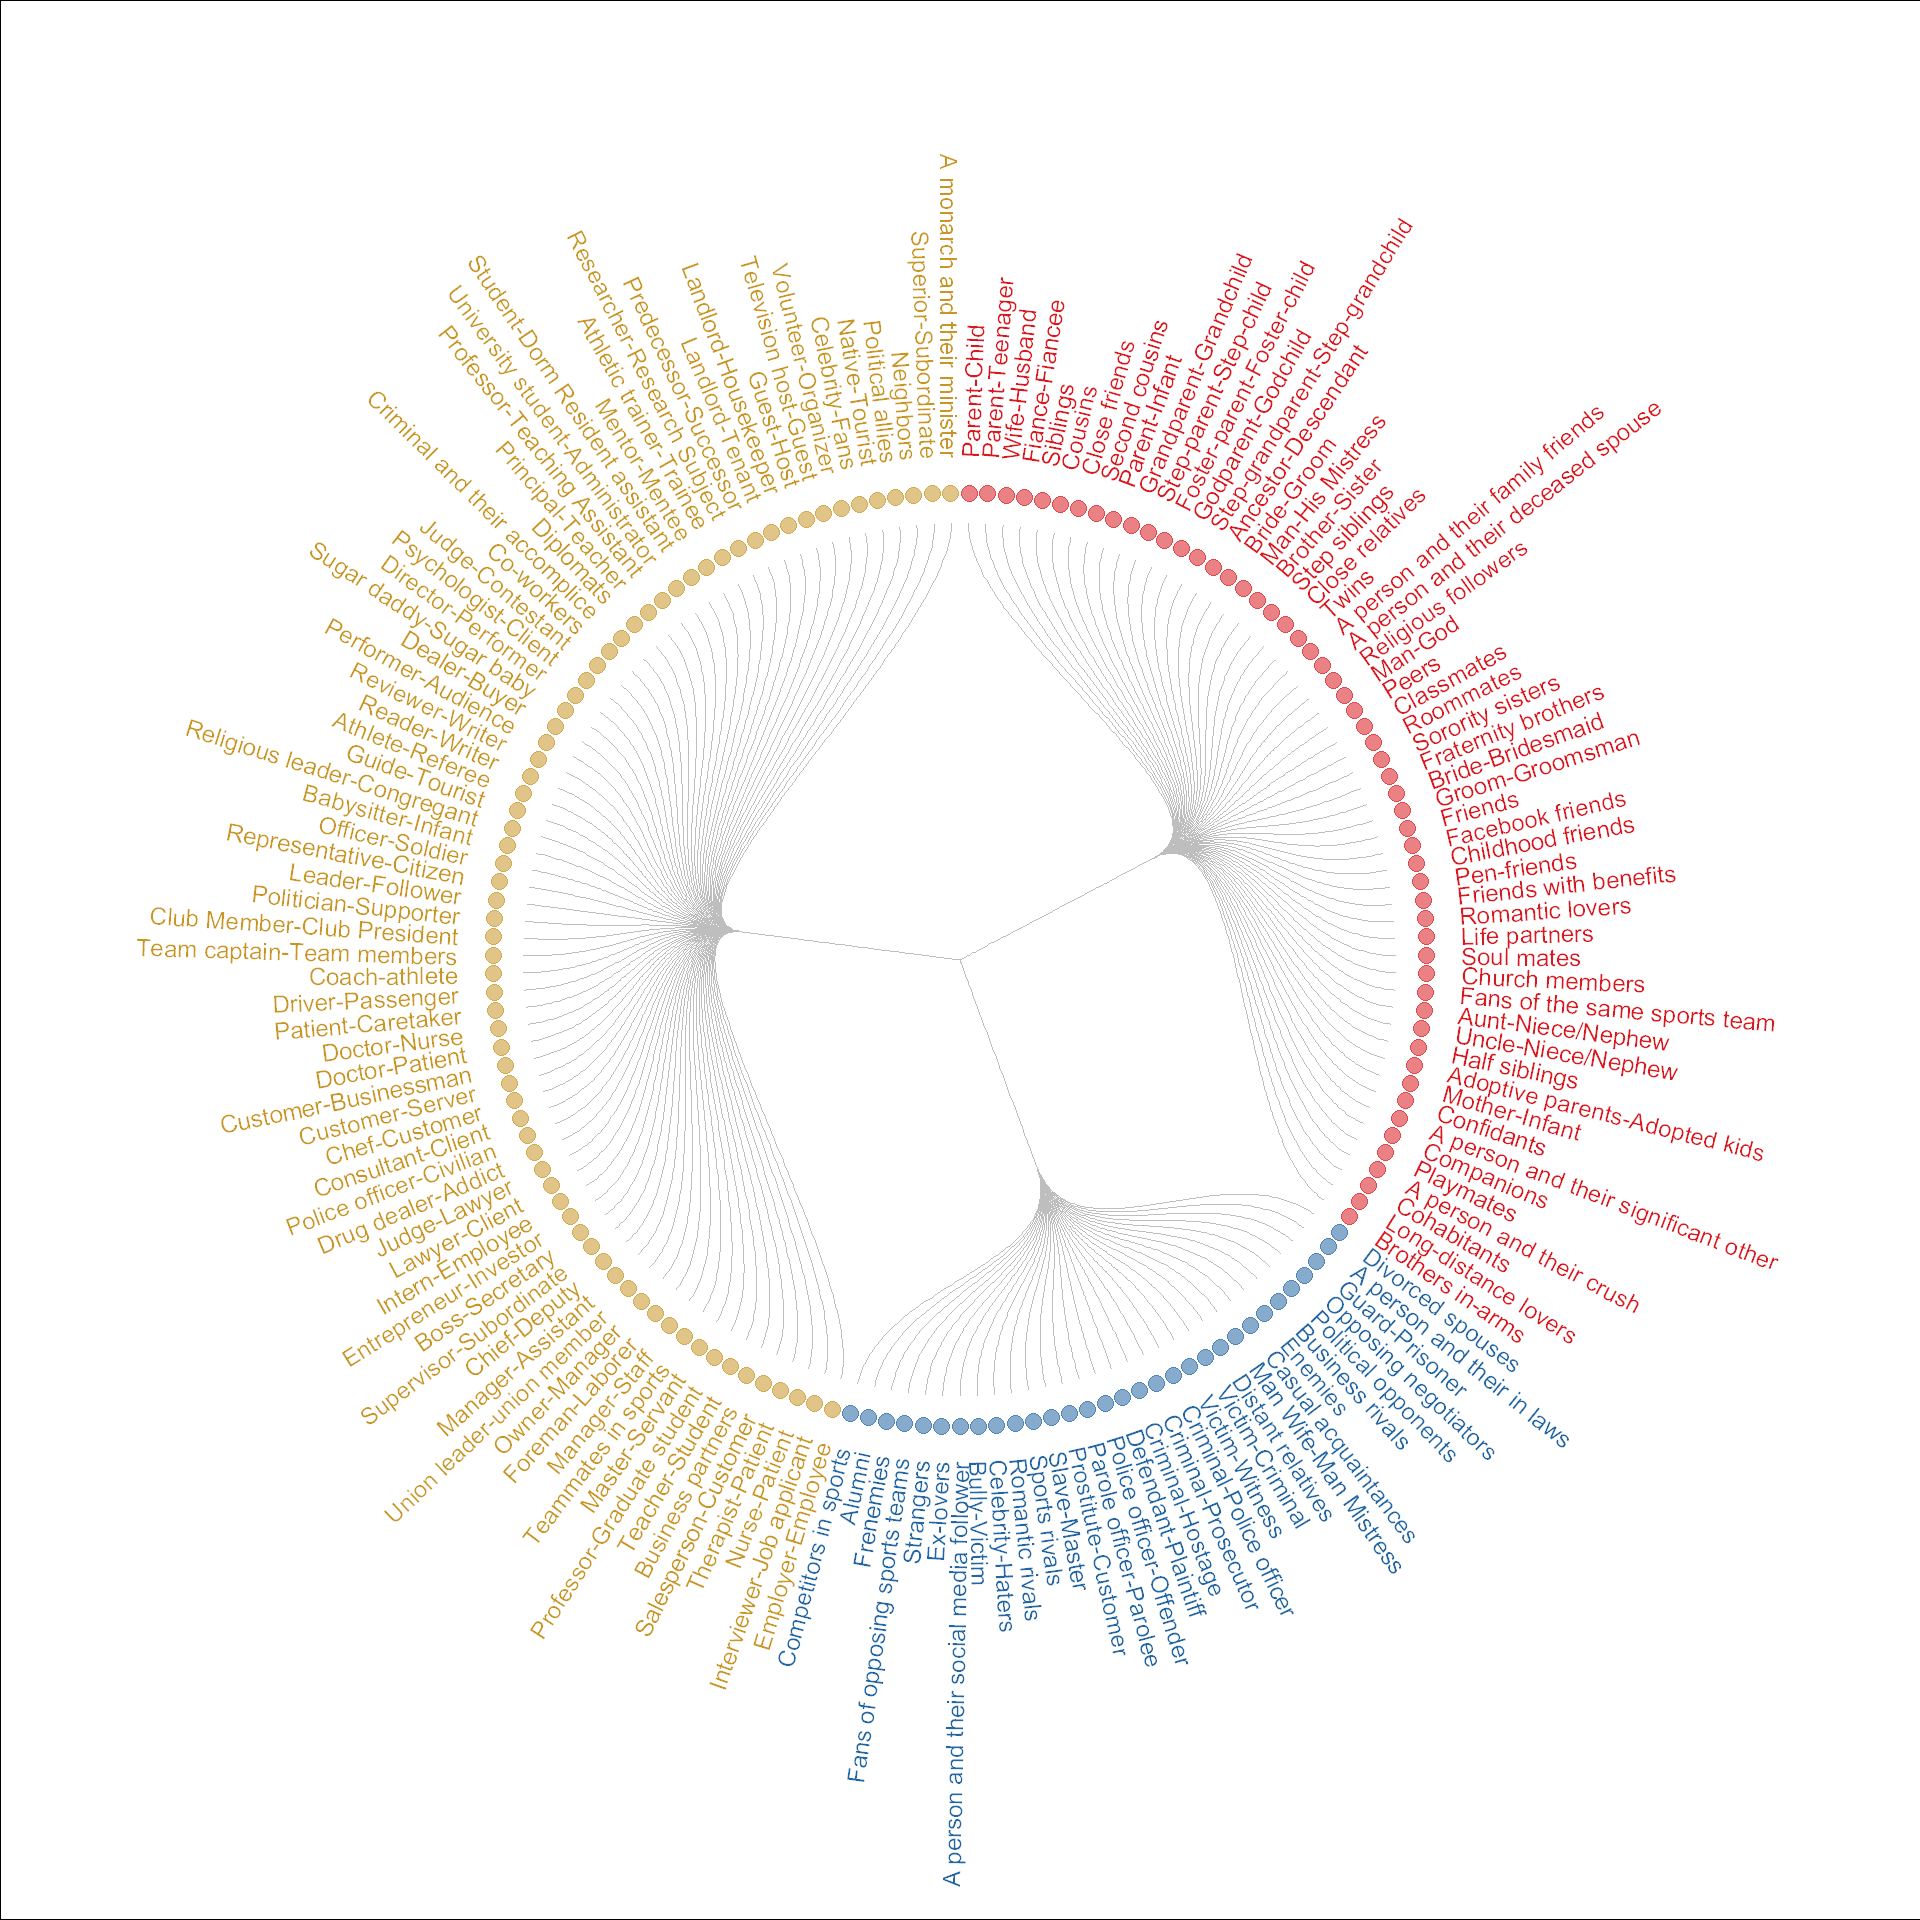

In [5]:
options(repr.plot.width=16,repr.plot.height=16)
my_colors = c('Hostile'='#2466A2','Public'='#C89626','Private'='#D81920')
# Make the plot
ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_edge_diagonal(colour="grey") +
  #scale_edge_colour_distiller(palette = "RdPu") +
  scale_colour_manual(values=my_colors)+
  geom_node_text(aes(x = x*1.15, y=y*1.15, filter = leaf, label=name, angle = angle, hjust=hjust, colour=group), size=5, alpha=1) +
  geom_node_point(aes(filter = leaf, x = x*1.07, y=y*1.07, colour=group, size=1, alpha=0.2)) +
  theme_void() +
  theme(
    legend.position="none",
    plot.margin=unit(c(0,0,0,0),"cm"),
    panel.background = element_rect(fill='white')
  ) +
  expand_limits(x = c(-2, 2), y = c(-2, 2))

png('../output_graph/world_averaged/raw_3k_white.png',family='sans',
    units='in',width=16,height=16,res=300)
# Make the plot
ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_edge_diagonal(colour="grey") +
  #scale_edge_colour_distiller(palette = "RdPu") +
  scale_colour_manual(values=my_colors)+
  geom_node_text(aes(x = x*1.15, y=y*1.15, filter = leaf, label=name, angle = angle, hjust=hjust, colour=group), size=5, alpha=1) +
  geom_node_point(aes(filter = leaf, x = x*1.07, y=y*1.07, colour=group, size=1, alpha=0.2)) +
  theme_void() +
  theme(
    legend.position="none",
    plot.margin=unit(c(0,0,0,0),"cm"),
    panel.background = element_rect(fill='white')
  ) +
  expand_limits(x = c(-2, 2), y = c(-2, 2))
dev.off()

## generate RDM based on cluster results: 0/1 matrix

In [ ]:
raw_dissim = pd.read_csv('Total/categorical_model/total_raw33d_dissim_3k.csv',
                        index_col=0)
raw_dissim_rdm = cluster_rdm(raw_dissim,cluster_model='cl_k3')
raw_dissim_rdm.to_csv('Total/categorical_model/rdm_total_raw33d_dissim_3k.csv')